In [71]:
import pandas as pd
import numpy as np
import seaborn as sns # For plotting
import matplotlib.pyplot as plt



In [ ]:
#read json as df
#df = pd.read_json("/Users/Mariane/Documents/Giving/out/Wort & Tat, Allgemeine Missions-Gesellschaft e.V..json")


# Prepare Data: Code to concetanate several json files

In [ ]:
#normalize json file

import json


dfList = []

with open('/Users/Mariane/Documents/Giving/out/Wort & Tat, Allgemeine Missions-Gesellschaft e.V..json') as project_file:    
   data = json.load(project_file)  

df1 = pd.json_normalize(data)

dfList.append(df1)

with open('/Users/Mariane/Documents/Giving/out/ADRA Deutschland e.V..json') as project_file:    
    data = json.load(project_file)  

df2 = pd.json_normalize(data)

dfList.append(df2)

from glob2 import glob
file_list = glob('/Users/Mariane/Documents/Giving/out/*.json')

for file in file_list:
    with open(file) as project_file:
        data = json.load(project_file)
        df = pd.json_normalize(data)
        dfList.append(df)

dfDZI = pd.concat(dfList, axis=0)

dfDZI.head()

# Code provided by Zubin that concetenate json files

In [ ]:
all_dfs = []
for i in my_files:
    data = json.load(open(f"out/{i}"))
    df = pd.json_normalize(data)
    all_dfs.append(df)

all_dfs = pd.concat(all_dfs)
all_dfs

all_dfs.to_csv("giving_data.csv", index=False)

In [86]:
df_dzi = pd.read_csv("/Users/Mariane/Documents/Giving/DZI_data.csv")

df_dzi.head()

,arbeitsschwerpunkte,landerschwerpunkte,tatigkeitsfelder,einschaetzung,header,right_data,finanzen.Bezugsjahr:,finanzen.Gesamteinnahmen:,finanzen.Davon Sammlungseinnahmen Hilfetext:,finanzen.Anteil Werbe- und Verwaltungskosten Hilfetext:
0,"Aids, Bildung, Bildungs- und Kampagnenarbeit, ...","Afghanistan, Albanien, Äthiopien, Bahamas, Ban...",ADRA Deutschland e.V. ist eine weltweit tätige...,"ADRA Deutschland e.V., Darmstadt, wurde das DZ...",ADRA Deutschland e.V.,"[{'Website': 'www.adra.de', 'E-Mail': 'info@ad...",2019,"\n 21.434.517,13 EUR ...",\n ...,niedrig
1,"Bildung, Bildungs- und Kampagnenarbeit, Entwic...",Brasilien,"Ziel des Vereins ist es, armen Menschen in Bra...","AIDA e.V. (Arco iris do amor, Regenbogen der L...","AIDA e.V. (Arco iris do amor, Regenbogen der L...","[{'Website': 'www.aida-ev.net', 'E-Mail': 'inf...",2019,"\n 103.054,58 EUR ...",\n ...,niedrig
2,"Bildung, Entwicklungszusammenarbeit, Gesundhei...",Tansania,Der AKO - Aktionskreis Ostafrika e.V. fördert ...,"AKO - Aktionskreis Ostafrika e.V., Traunstein,...",AKO – Aktionskreis Ostafrika e.V.,"[{'Website': 'www.aktionskreis-ostafrika.de', ...",2019,"\n 595.794,24 EUR ...",\n ...,niedrig
3,"Bildung, Corona-Hilfe, Entwicklungszusammenarb...","Kenia, Malawi, Senegal, Südsudan, Tansania, Ug...",AMREF Deutschland unterstützt als deutscher Fö...,"AMREF Deutschland, Gesellschaft für Medizin un...","AMREF Deutschland, Gesellschaft für Medizin un...","[{'Website': 'www.amrefgermany.de', 'E-Mail': ...",2018,"\n 1.898.162,79 EUR ...",\n ...,angemessen
4,"Bildung, Entwicklungszusammenarbeit, Frauenför...",Eritrea,ARCHEMED unterstützt verschiedene Projekte in ...,"ARCHEMED - Ärzte für Kinder in Not e.V., Soest...",ARCHEMED – Ärzte für Kinder in Not e.V.,"[{'Website': 'www.archemed.org', 'E-Mail': 'in...",2019,"\n 1.668.721,69 EUR ...",\n ...,angemessen


# General Data Exploration

In [7]:
df_dzi.describe()

,finanzen.Bezugsjahr:
count,230.000000
mean,2019.113043
std,0.702649
min,2017.000000
25%,2019.000000
50%,2019.000000
75%,2020.000000
max,2021.000000


In [66]:
df_dzi.dtypes

arbeitsschwerpunkte                                        object
landerschwerpunkte                                         object
tatigkeitsfelder                                           object
einschaetzung                                              object
header                                                     object
right_data                                                 object
finanzen.Bezugsjahr:                                        int64
finanzen.Gesamteinnahmen:                                   int64
finanzen.Davon Sammlungseinnahmen Hilfetext:               object
finanzen.Anteil Werbe- und Verwaltungskosten Hilfetext:    object
dtype: object

# Clean Data Frame

Transform objects into integers

In [68]:
df_dzi['finanzen.Gesamteinnahmen:'] = df_dzi['finanzen.Gesamteinnahmen:'].replace(r'[,\"\'\.]','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)
df_dzi['finanzen.Gesamteinnahmen:'] = df_dzi['finanzen.Gesamteinnahmen:'].astype('int')

df_dzi

,arbeitsschwerpunkte,landerschwerpunkte,tatigkeitsfelder,einschaetzung,header,right_data,finanzen.Bezugsjahr:,finanzen.Gesamteinnahmen:,finanzen.Davon Sammlungseinnahmen Hilfetext:,finanzen.Anteil Werbe- und Verwaltungskosten Hilfetext:
0,"Aids, Bildung, Bildungs- und Kampagnenarbeit, ...","Afghanistan, Albanien, Äthiopien, Bahamas, Ban...",ADRA Deutschland e.V. ist eine weltweit tätige...,"ADRA Deutschland e.V., Darmstadt, wurde das DZ...",ADRA Deutschland e.V.,"[{'Website': 'www.adra.de', 'E-Mail': 'info@ad...",2019,2143451713,\n ...,niedrig
1,"Bildung, Bildungs- und Kampagnenarbeit, Entwic...",Brasilien,"Ziel des Vereins ist es, armen Menschen in Bra...","AIDA e.V. (Arco iris do amor, Regenbogen der L...","AIDA e.V. (Arco iris do amor, Regenbogen der L...","[{'Website': 'www.aida-ev.net', 'E-Mail': 'inf...",2019,10305458,\n ...,niedrig
2,"Bildung, Entwicklungszusammenarbeit, Gesundhei...",Tansania,Der AKO - Aktionskreis Ostafrika e.V. fördert ...,"AKO - Aktionskreis Ostafrika e.V., Traunstein,...",AKO – Aktionskreis Ostafrika e.V.,"[{'Website': 'www.aktionskreis-ostafrika.de', ...",2019,59579424,\n ...,niedrig
3,"Bildung, Corona-Hilfe, Entwicklungszusammenarb...","Kenia, Malawi, Senegal, Südsudan, Tansania, Ug...",AMREF Deutschland unterstützt als deutscher Fö...,"AMREF Deutschland, Gesellschaft für Medizin un...","AMREF Deutschland, Gesellschaft für Medizin un...","[{'Website': 'www.amrefgermany.de', 'E-Mail': ...",2018,189816279,\n ...,angemessen
4,"Bildung, Entwicklungszusammenarbeit, Frauenför...",Eritrea,ARCHEMED unterstützt verschiedene Projekte in ...,"ARCHEMED - Ärzte für Kinder in Not e.V., Soest...",ARCHEMED – Ärzte für Kinder in Not e.V.,"[{'Website': 'www.archemed.org', 'E-Mail': 'in...",2019,166872169,\n ...,angemessen
...,...,...,...,...,...,...,...,...,...,...
225,"Bildung, Corona-Hilfe, Entwicklungszusammenarb...","Ägypten, Algerien, Angola, Äquatorialguinea, A...",Missio Aachen fördert die Ausbildung von Pries...,missio – Internationales Katholisches Missions...,missio – Internationales Katholisches Missions...,"[{'Website': 'www.missio-hilft.de', 'E-Mail': ...",2019,5178832730,\n ...,niedrig
226,"Behindertenhilfe, Bildung, Bildungs- und Kampa...","Bolivien, Dominikanische Republik, El Salvador...",nph Kinderhilfe Lateinamerika e.V. unterstützt...,"nph Kinderhilfe Lateinamerika e.V., Karlsruhe,...",nph Kinderhilfe Lateinamerika e.V.,"[{'Website': 'www.nph-kinderhilfe.org', 'E-Mai...",2020,1063600864,\n ...,vertretbar
227,"Bildung, Corona-Hilfe, Entwicklungszusammenarb...","Albanien, Burundi, Deutschland, Kenia, Libanon...",ora Kinderhilfe International e.V. engagiert s...,"ora Kinderhilfe International e.V., Berlin, wu...",ora Kinderhilfe International e.V.,"[{'Website': 'www.ora-kinderhilfe.de', 'E-Mail...",2019,472596231,\n ...,angemessen
228,"Behindertenhilfe, Bildung, Einzelfallhilfe, Fa...",Russische Föderation,projekt Anna – Kinderhilfe Kaliningrad e.V. en...,"projekt Anna – Kinderhilfe Kaliningrad e.V., M...",projekt Anna – Kinderhilfe Kaliningrad e.V.,"[{'Website': 'www.projekt-anna.de', 'E-Mail': ...",2019,5153074,\n ...,niedrig


# Analytics Finances

In [70]:
df_dzi["finanzen.Gesamteinnahmen:"].describe()

count    2.300000e+02
mean     2.747757e+09
std      1.113231e+10
min      3.117396e+06
25%      4.346825e+07
50%      1.798203e+08
75%      9.031030e+08
max      1.388701e+11
Name: finanzen.Gesamteinnahmen:, dtype: float64

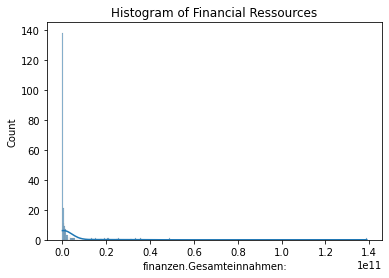

In [73]:
sns.histplot(df_dzi["finanzen.Gesamteinnahmen:"], kde = True).set_title("Histogram of Financial Ressources")
plt.show()



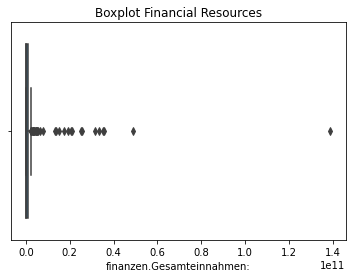

In [76]:
sns.boxplot(x = df_dzi["finanzen.Gesamteinnahmen:"]).set_title("Boxplot Financial Resources")
plt.show()

In [77]:
df_dzi.nlargest(10, "finanzen.Gesamteinnahmen:")

,arbeitsschwerpunkte,landerschwerpunkte,tatigkeitsfelder,einschaetzung,header,right_data,finanzen.Bezugsjahr:,finanzen.Gesamteinnahmen:,finanzen.Davon Sammlungseinnahmen Hilfetext:,finanzen.Anteil Werbe- und Verwaltungskosten Hilfetext:
122,"Altenhilfe, Behindertenhilfe, Bildungs- und Ka...","Afghanistan, Demokratische Republik Kongo, Deu...",Die Arbeitsbereiche der Johanniter-Unfall-Hilf...,"Der Johanniter-Unfall-Hilfe e.V., Berlin, wurd...",Johanniter-Unfall-Hilfe e.V.,"[{'Website': 'www.johanniter.de', 'E-Mail': 'i...",2020,138870092600,\n ...,angemessen
43,"Aids, Altenhilfe, Behindertenhilfe, Bildung, C...",Deutschland,Unter dem Dach des Caritasverbands der Erzdiöz...,Dem Caritasverband der Erzdiözese München und ...,Caritasverband der Erzdiözese München und Frei...,[{'Website': 'www.caritas-nah-am-naechsten.de'...,2019,48902569870,\n ...,niedrig
41,"Altenhilfe, Behindertenhilfe, Bildungs- und Ka...","Ägypten, Äthiopien, Bangladesch, Benin, Bolivi...",Die CBM Christoffel-Blindenmission Christian B...,CBM Christoffel-Blindenmission Christian Blind...,CBM Christoffel-Blindenmission Christian Blind...,"[{'Website': 'www.cbm.de', 'E-Mail': 'info@cbm...",2020,35638907510,\n ...,angemessen
176,"Behindertenhilfe, Bildung, Entwicklungszusamme...","Ägypten, Argentinien, Aserbaidschan, Äthiopien...",SOS Kinderdorf e.V. betreibt in Deutschland ei...,"SOS-Kinderdorf e.V., München, wurde das DZI Sp...",SOS-Kinderdorf e.V.,"[{'Website': 'www.sos-kinderdorf.de', 'E-Mail'...",2019,35381828120,\n ...,angemessen
72,"Altenhilfe, Behindertenhilfe, Bildung, Gesundh...","Deutschland, Polen, Rumänien",Diakoneo ist mit über 200 Einrichtungen und me...,"Diakoneo, Neuendettelsau, wurde das DZI Spende...",Diakoneo,"[{'Website': 'www.diakoneo.de', 'E-Mail': 'inf...",2017,33369982820,\n ...,niedrig
35,"Bildung, Bildungs- und Kampagnenarbeit, Entwic...","Ägypten, Albanien, Angola, Argentinien, Armeni...",Brot für die Welt ist eine Aktion der evangeli...,"Brot für die Welt, Berlin, wurde das DZI Spend...",Brot für die Welt,"[{'Website': 'www.brot-fuer-die-welt.de', 'E-M...",2019,31344357300,\n ...,niedrig
33,"Bildung, Bildungs- und Kampagnenarbeit, Corona...","Afghanistan, Ägypten, Algerien, Angola, Argent...",Misereor fördert weltweit Projekte in allen Be...,"Dem Bischöflichen Hilfswerk MISEREOR e.V., Aac...",Bischöfliches Hilfswerk MISEREOR e.V.,"[{'Website': 'www.misereor.de', 'E-Mail': 'pos...",2019,25737380950,\n ...,niedrig
64,"Bildung, Bildungs- und Kampagnenarbeit, Corona...","Afghanistan, Äthiopien, Bangladesch, Bolivien,...",Die Deutsche Welthungerhilfe e.V. (DWHH) förde...,"Der Deutschen Welthungerhilfe e.V., Bonn, wurd...",Deutsche Welthungerhilfe e.V.,"[{'Website': 'www.welthungerhilfe.de', 'E-Mail...",2019,24965639490,\n ...,niedrig
169,"Bildung, Bildungs- und Kampagnenarbeit, Corona...","Ägypten, Äthiopien, Bangladesch, Benin, Bolivi...",Plan International Deutschland e.V. unterstütz...,"Plan International Deutschland e.V., Hamburg, ...",Plan International Deutschland e.V.,"[{'Website': 'www.plan.de', 'E-Mail': 'info@pl...",2020,20907156670,\n ...,angemessen
27,"Corona-Hilfe, Flüchtlingsfürsorge, Gesundheits...","Afghanistan, Armenien, Äthiopien, Bangladesch,...",Das internationale Netzwerk Ärzte ohne Grenzen...,Ärzte ohne Grenzen e.V. - Médecins Sans Fronti...,Ärzte ohne Grenzen e.V. – Médecins Sans Fronti...,"[{'Website': 'www.aerzte-ohne-grenzen.de', 'E-...",2020,20658697240,\n ...,angemessen


There's one big outlier with a lot of financial Resources which is Johanniter Unfallhilfe e.V.

In [8]:
df_dzi[['arbeitsschwerpunkte', 'landerschwerpunkte', 'tatigkeitsfelder']] \
    .describe(include=object) \
        .transpose()

,count,unique,top,freq
arbeitsschwerpunkte,230,213,"Bildung, Entwicklungszusammenarbeit, Frauenför...",4
landerschwerpunkte,230,159,Deutschland,49
tatigkeitsfelder,230,230,ADRA Deutschland e.V. ist eine weltweit tätige...,1


In [12]:
df_dzi["finanzen.Anteil Werbe- und Verwaltungskosten Hilfetext:"].value_counts()

niedrig       103
angemessen    100
vertretbar     27
Name: finanzen.Anteil Werbe- und Verwaltungskosten Hilfetext:, dtype: int64

In [78]:
df_dzi[['landerschwerpunkte', 'arbeitsschwerpunkte', 'tatigkeitsfelder']] \
    .describe(include=object) \
        .transpose()

,count,unique,top,freq
landerschwerpunkte,230,159,Deutschland,49
arbeitsschwerpunkte,230,213,"Bildung, Entwicklungszusammenarbeit, Frauenför...",4
tatigkeitsfelder,230,230,ADRA Deutschland e.V. ist eine weltweit tätige...,1


# Text Analytics 

In [82]:
#df_dzi['landerschwerpunkte'] = df_dzi['landerschwerpunkte'].replace(r'[,\"\'\.]','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)
#df_dzi['tatigkeitsfelder'] = df_dzi['tatigkeitsfelder'].replace(r'[,\"\'\.]','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)

In [105]:
from collections import Counter

def my_tokenizer(text):
    return text.split() if text != None else []
tokens = df_dzi.landerschwerpunkte.map(my_tokenizer).sum()
counter_länder = Counter(tokens)
counter_länder.most_common(20)

[('Deutschland,', 94),
 ('Republik', 72),
 ('Indien,', 65),
 ('Kenia,', 56),
 ('Deutschland', 55),
 ('Demokratische', 49),
 ('Äthiopien,', 48),
 ('Kongo,', 46),
 ('Bangladesch,', 43),
 ('Philippinen,', 41),
 ('Nepal,', 40),
 ('Indonesien,', 39),
 ('Südsudan,', 38),
 ('Brasilien,', 38),
 ('Mosambik,', 37),
 ('Tansania,', 36),
 ('Südafrika,', 36),
 ('Haiti,', 35),
 ('Peru,', 35),
 ('Syrien,', 35)]

<AxesSubplot:xlabel='landerschwerpunkte'>

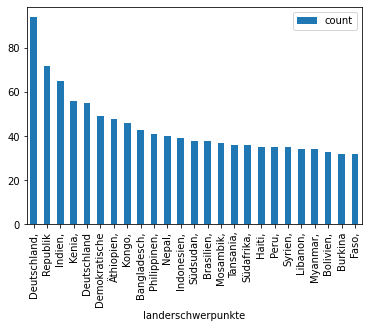

In [106]:
freq_df = pd.DataFrame.from_records(counter_länder.most_common(25), columns = ['landerschwerpunkte', 'count'])
freq_df.plot(kind = 'bar', x='landerschwerpunkte')

In [107]:
def my_tokenizer(text):
    return text.split() if text != None else []
tokens = df_dzi.tatigkeitsfelder.map(my_tokenizer).sum()
counter_tätigkeitsfelder = Counter(tokens)
counter_tätigkeitsfelder.most_common(20)

[('und', 1521),
 ('der', 972),
 ('die', 852),
 ('in', 780),
 ('von', 483),
 ('für', 379),
 ('den', 280),
 ('Die', 263),
 ('mit', 239),
 ('sowie', 236),
 ('Verein', 209),
 ('zu', 193),
 ('sich', 181),
 ('des', 174),
 ('e.V.', 170),
 ('im', 161),
 ('ist', 152),
 ('unterstützt', 145),
 ('Kinder', 138),
 ('das', 137)]

In [108]:
from spacy.lang.de.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]

counter_tätigkeitsfelder = Counter(remove_stopwords(tokens))
counter_tätigkeitsfelder.most_common(20)

[('Die', 263),
 ('Verein', 209),
 ('e.V.', 170),
 ('unterstützt', 145),
 ('Kinder', 138),
 ('Projekte', 107),
 ('fördert', 107),
 ('Organisation', 105),
 ('Der', 102),
 ('Menschen', 95),
 ('insbesondere', 93),
 ('Deutschland', 86),
 ('Stiftung', 86),
 ('hinaus', 83),
 ('In', 74),
 ('Darüber', 70),
 ('leistet', 70),
 ('Kindern', 60),
 ('Hilfe', 55),
 ('setzt', 54)]

In [109]:
def my_tokenizer(text):
    return text.split() if text != None else []
tokens = df_dzi.arbeitsschwerpunkte.map(my_tokenizer).sum()
counter_tätigkeitsfelder = Counter(tokens)
counter_tätigkeitsfelder.most_common(20)

[('und', 300),
 ('Kinder-', 161),
 ('Bildung,', 153),
 ('Entwicklungszusammenarbeit,', 142),
 ('Gesundheitshilfe,', 134),
 ('Bildungs-', 116),
 ('Kampagnenarbeit,', 116),
 ('Jugendhilfe,', 107),
 ('Frauenförderung,', 81),
 ('Corona-Hilfe,', 67),
 ('Katastrophenhilfe,', 59),
 ('Völkerverständigung', 58),
 ('Behindertenhilfe,', 57),
 ('Jugendhilfe', 54),
 ('Flüchtlingsfürsorge,', 53),
 ('Familienfürsorge,', 52),
 ('Einzelfallhilfe,', 39),
 ('Menschenrechte,', 33),
 ('Altenhilfe,', 24),
 ('Umwelt-', 23)]

<AxesSubplot:xlabel='token'>

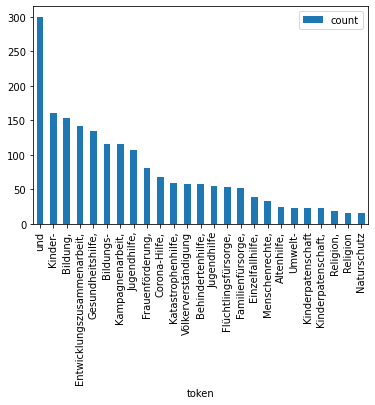

In [110]:
freq_df = pd.DataFrame.from_records(counter_tätigkeitsfelder.most_common(25), columns = ['token', 'count'])
freq_df.plot(kind='bar', x='token')